<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.shape

(4238, 16)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [10]:
num=[]
cat=[]
for i in df.columns:
  if df[i].dtypes=='object':
    cat.append(i)
  else:
    num.append(i)

In [11]:
num

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [16]:
for i in num:
  print(i.upper())
  print(df[i].value_counts(),'\n')

MALE
0    2419
1    1819
Name: male, dtype: int64 

AGE
40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
68     18
34     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64 

EDUCATION
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64 

CURRENTSMOKER
0    2144
1    2094
Name: currentSmoker, dtype: int64 

CIGSPERDAY
0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
16.0       3
13.0       3
12.0  

In [18]:
dups=df.duplicated()
print('Number of duplicated rows {}'.format(dups.sum()))

Number of duplicated rows 0


In [19]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

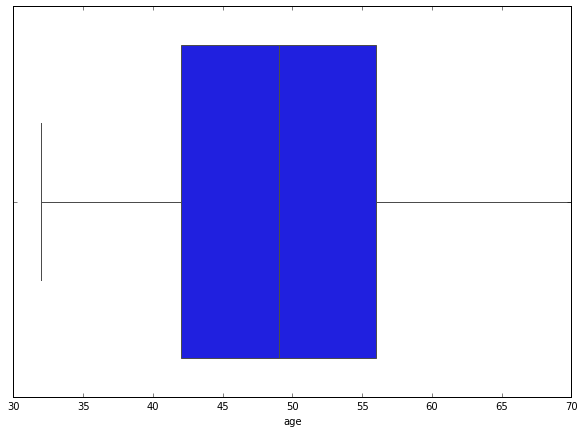

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(df.age)
plt.show()

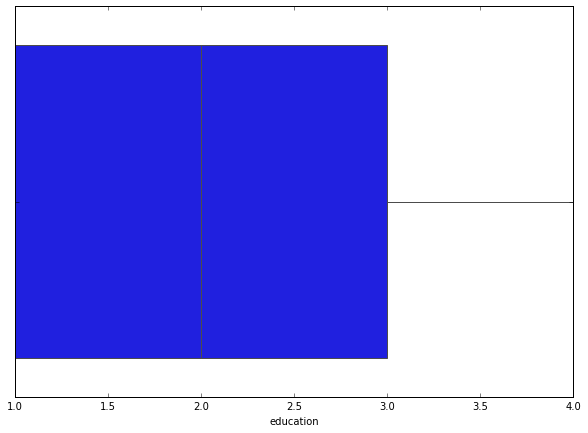

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(df.education)
plt.show()

,Quantity,Percentage
No Disease,3594,84.8042
Disease,644,15.1958


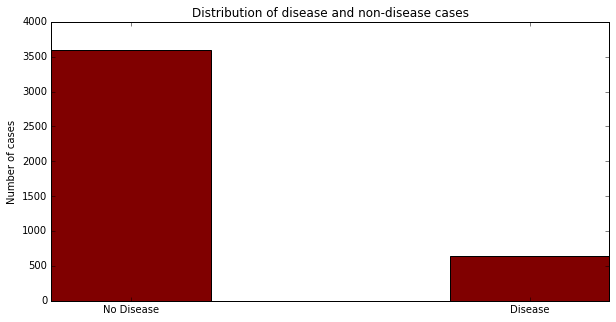

In [24]:
target_pd = pd.DataFrame(index = ["No Disease","Disease"], columns= ["Quantity", "Percentage"])
# No disease
target_pd.loc["No Disease"]["Quantity"] = len(df[df.columns[-1]][df[df.columns[-1]]==0].dropna())
target_pd.loc["No Disease"]["Percentage"] = target_pd.iloc[0,0]/len(df[df.columns[-1]])*100
# Disease
target_pd.loc["Disease"]["Quantity"] = len(df[df.columns[-1]][df[df.columns[-1]]==1].dropna())
target_pd.loc["Disease"]["Percentage"] = target_pd.iloc[1,0]/len(df[df.columns[-1]])*100
# Plot barchart
fig = plt.figure(figsize = (10, 5))
plt.bar(list(target_pd.index), target_pd.iloc[:,0], color ='maroon',width = 0.4)
plt.ylabel("Number of cases")
plt.title("Distribution of disease and non-disease cases");
# Print the dataframe
target_pd

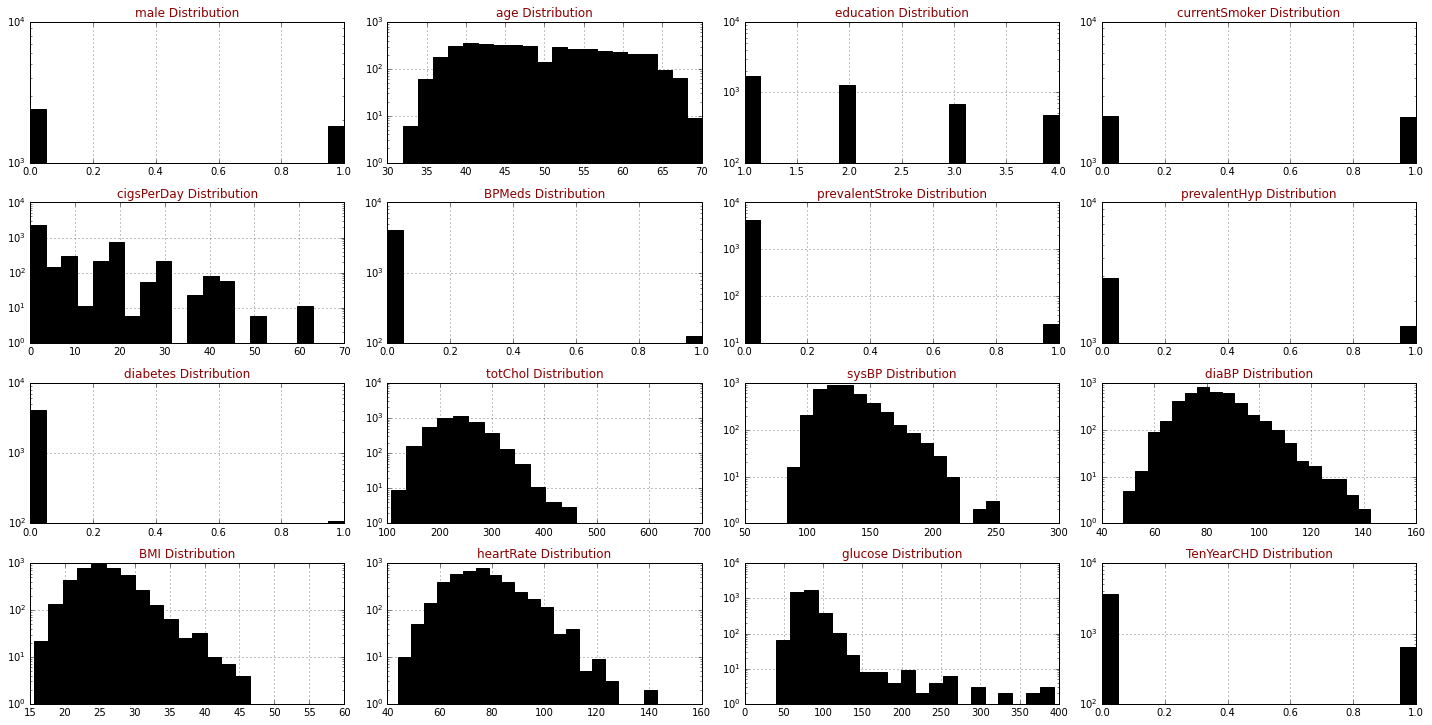

In [25]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    ax=fig.add_subplot(8,4,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='black')
    ax.set_title(feature+" Distribution",color='DarkRed')
    ax.set_yscale('log')
fig.tight_layout() 

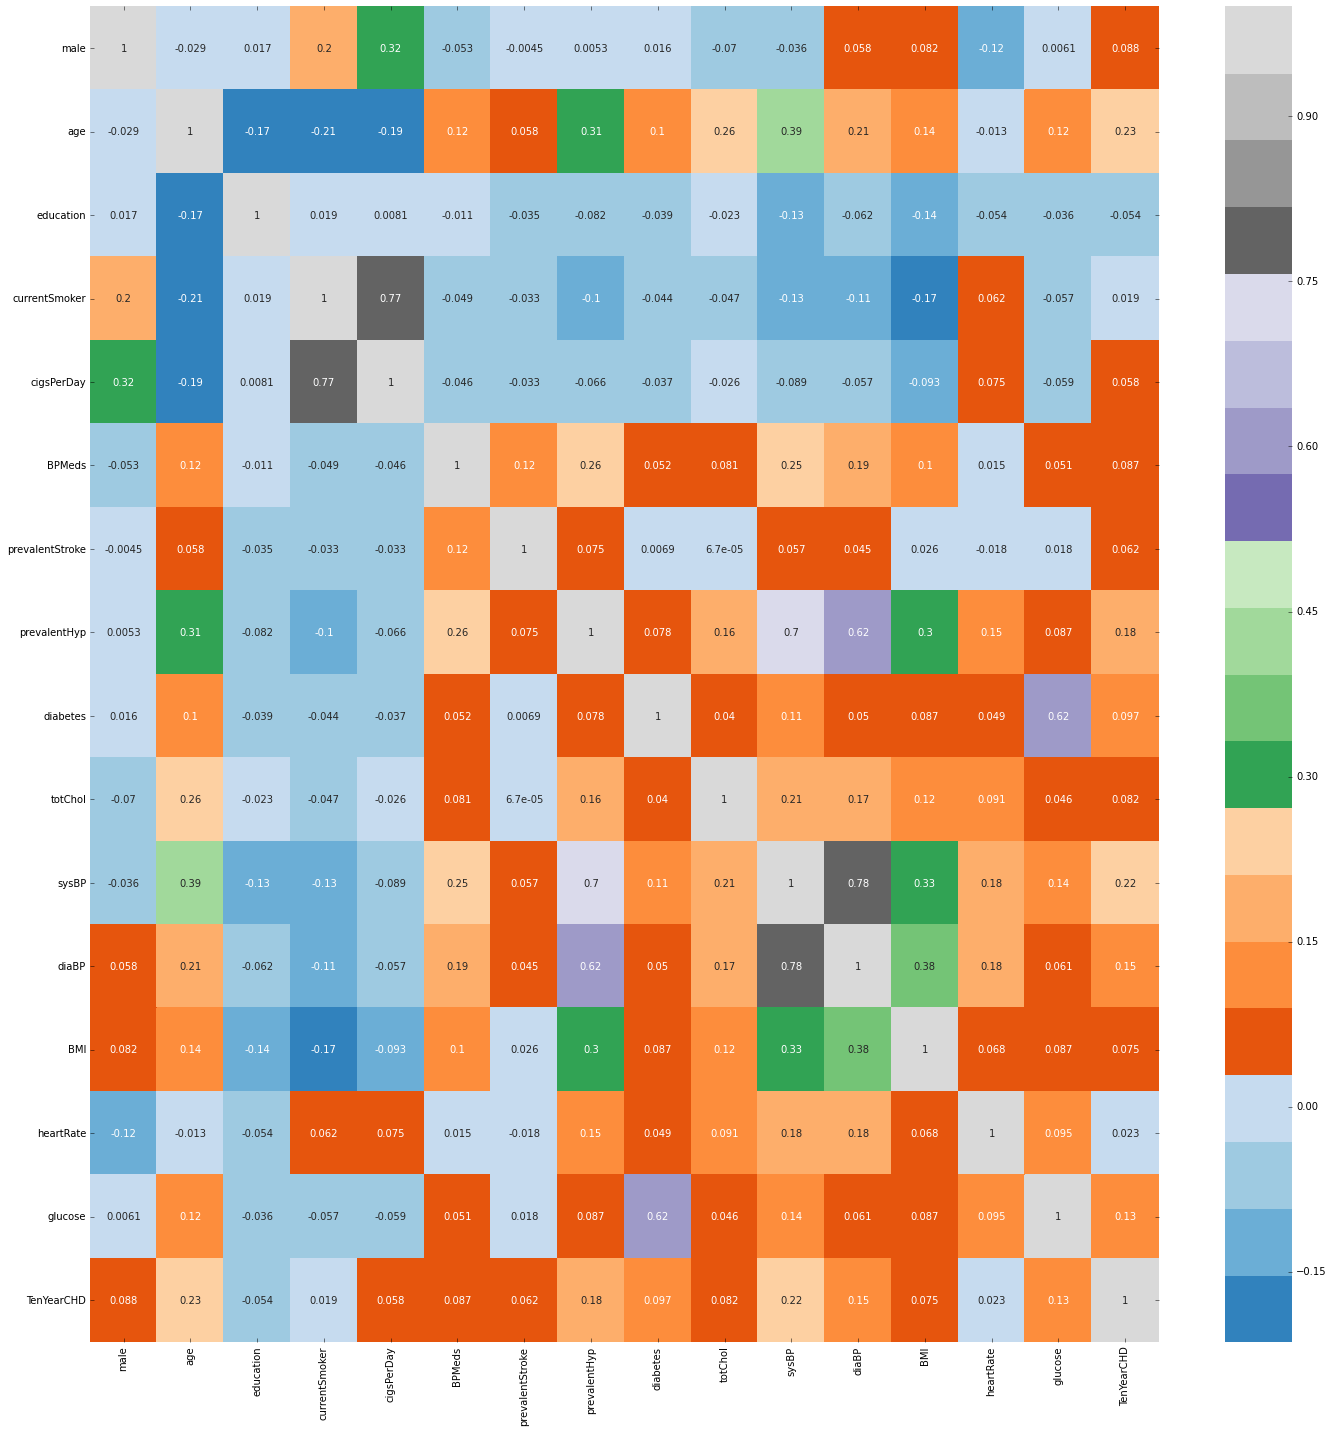

In [26]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap="tab20c");
fig.tight_layout()  

In [27]:
df=df.dropna()

In [28]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

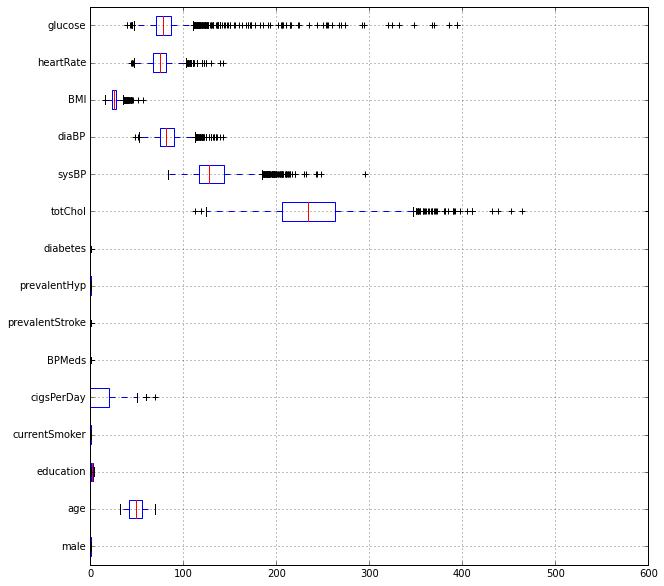

In [34]:
plt.figure(figsize=(10,10))
df.iloc[:,:15].boxplot(vert=0)
plt.show()

Remove Outliers

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [41]:
for column in df.iloc[:,1:15].columns:
  lr,ur=remove_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])

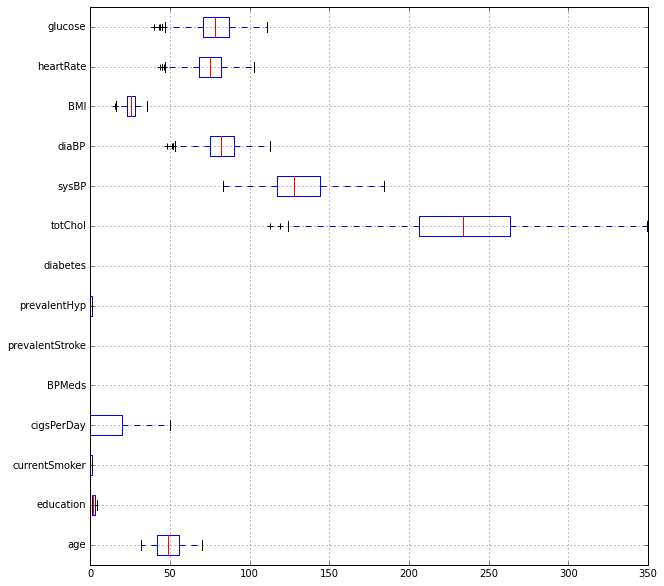

In [43]:
plt.figure(figsize=(10,10))
df.iloc[:,1:15].boxplot(vert=0)

In [44]:
y=df['diagnosis']

KeyError: ignored

In [45]:
y=df[df.columns[-1]]

In [46]:
X=df[df.columns[:-1]]

In [47]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0


In [51]:
num1=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [52]:
X[num1]=X[num1].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [53]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,0.184211,4.0,0.0,0.00,0.0,0.0,0.0,0.0,0.347274,0.222772,0.341085,0.573220,0.610169,0.521127
1,0,0.368421,2.0,0.0,0.00,0.0,0.0,0.0,0.0,0.580201,0.371287,0.511628,0.661484,0.864407,0.507042
2,1,0.421053,1.0,1.0,0.40,0.0,0.0,0.0,0.0,0.559026,0.435644,0.496124,0.491474,0.525424,0.422535
3,0,0.763158,3.0,1.0,0.60,0.0,0.0,1.0,0.0,0.474325,0.658416,0.728682,0.653962,0.355932,0.887324
4,0,0.368421,3.0,1.0,0.46,0.0,0.0,0.0,0.0,0.728428,0.460396,0.558140,0.379137,0.694915,0.633803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,0.684211,3.0,0.0,0.00,0.0,0.0,1.0,0.0,0.313393,0.569307,0.511628,0.472417,0.610169,0.577465
4232,1,0.947368,1.0,0.0,0.00,0.0,0.0,1.0,0.0,0.266808,0.836634,0.759690,0.381143,0.271186,0.549296
4233,1,0.473684,1.0,1.0,0.02,0.0,0.0,1.0,0.0,0.847009,0.945545,0.682171,0.523069,0.372881,0.647887
4234,1,0.500000,3.0,1.0,0.86,0.0,0.0,0.0,0.0,0.398094,0.425743,0.496124,0.209127,0.355932,0.394366


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [55]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred=NB_model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
accuracy_score(y_test,y_pred)

0.8030634573304157

In [61]:
y.value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       780
           1       0.34      0.37      0.35       134

    accuracy                           0.80       914
   macro avg       0.61      0.62      0.62       914
weighted avg       0.81      0.80      0.81       914

